In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.contrib.learn.python.learn.datasets import mnist as mnist_loader

mnist = mnist_loader.read_data_sets("MNIST_data/", one_hot=True)

C:\Users\81804\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\81804\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\81804\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\81804\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
import tensorflow as tf
import numpy as np

from tensorflow.contrib.learn.python.learn.datasets import mnist as mnist_loader

# 手書き数字の学習データを読み込み
mnist = mnist_loader.read_data_sets("MNIST_data/", one_hot=True)

# ニューラルネットワークサイズ等設定値を指定。
x = tf.placeholder("float",[None,784])
Weight = tf.Variable(tf.zeros([784,10])) # 縦28セル*横28セルなので、ニューラルネットワークの第1層は。784
b = tf.Variable(tf.zeros([10])) # 第2層は10個のニューロンを設定。10個の数字の対応する箇所の値が大きくなるよう学習させる
y = tf.nn.softmax(tf.matmul(x,Weight)+b)
y_ = tf.placeholder("float",[None,10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

# 学習の実行。ニューラルネットワークに学習させる回数は1200回。
init = tf.global_variables_initializer() 
ss = tf.InteractiveSession()
ss.run(init)

for times in range(1200):
    xb, yb = mnist.train.next_batch(100)
    ss.run(train_step, feed_dict={x: xb, y_: yb})

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


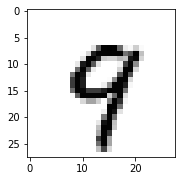

In [4]:
import matplotlib.pyplot as plt

# 学習データの可視化
index_test_image = 12 #何番目のデータを可視化するかここで指定

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.imshow(mnist.test.images[index_test_image].reshape([28, 28]), cmap="Greys")

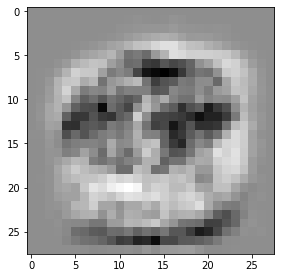

In [6]:
# 重みの可視化

weight = Weight.eval().T
fig = plt.figure(figsize=(15, 10))

# 0可視化する数字を指定。ここでは9を指定。
targetNum = 9; 

ax = fig.add_subplot(2, 1, 1)
ax.imshow(weight[targetNum].reshape([28, 28]), cmap="Greys")

In [13]:
from IPython.core.display import HTML
import base64
import numpy as np
from io import BytesIO
from PIL import Image

numcanvas = '''
    使い方：<BR>
    ①黄色の範囲内にマウスでに数字を書きます<BR>
    <canvas id="numArea" height="28px" width="28px" 
    style="border: 3px double #999999; background-color:yellow;"></canvas>
    <BR>

    <button id="save">②このボタンを押すと数値（配列）に変換されます</button>
    <BR>
    （書き直す場合はセルを再実行して下さい）
    <script>
        var kernel = IPython.notebook.kernel;

        var currentX ;
        var currentY ;
        var isMoving = 0;

        var imgDecoded 
            = 'imgArray = np.asarray(Image.open(BytesIO(base64.b64decode(imgDataSp))))[:,:,3]'
        var save = document.getElementById("save");
        var numArea = document.getElementById("numArea");
        var context;
        if (numArea.getContext("2d")){
            context = numArea.getContext("2d");
        }

        save.addEventListener("click", function(){
            kernel.execute("imgData = '" + numArea.toDataURL() + "'");
            kernel.execute('imgDataSp = imgData.split(",")[-1]');
            kernel.execute('imgArray = '+imgDecoded);
        });

        numArea.addEventListener("mouseup", end, false);
        numArea.addEventListener("mousemove", move, false);
        numArea.addEventListener("mousedown", start, false);

        function end(evt){
            if(isMoving === 0){
               context.lineTo(currentX-1, currentY-1);
               context.lineWidth = 2;
               context.stroke();

            }
            isMoving = 0;
        }

        function move(evt){
          if(evt.buttons === 1 || evt.witch === 1 ){
            currentX = evt.layerX;
            currentY = evt.layerY;
            isMoving = 1;

            context.lineTo(currentX, currentY);
            context.lineWidth = 2;
            context.stroke();
          }
        }

        function start(evt){
          evt.preventDefault();
          context.beginPath();

          currentX = evt.layerX;
          currentY = evt.layerY;

          context.moveTo(currentX, currentY);
        }

    </script>
'''

HTML(numcanvas)

取り込んだ文字（拡大）


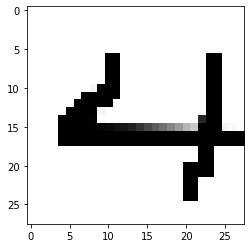

文字を①次元の配列に変換した数値を参照すると、0から255の値であることがわかります
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255
   0   0   0   0   0   0   0   0   0   0   0 255 255   0   0   0   0   0
   0   0   0   0   0   0   0   0 255 255   0   0   0   0   0   0   0   0
   0   0   0 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0
 255 255

In [14]:
print("取り込んだ文字（拡大）")
plt.imshow(imgArray, cmap="Greys")
plt.show()

print("文字を①次元の配列に変換した数値を参照すると、0から255の値であることがわかります")
imgArray_flatten = imgArray.flatten()#1次元のベクトルに変換
print(imgArray_flatten)

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


<BarContainer object of 10 artists>

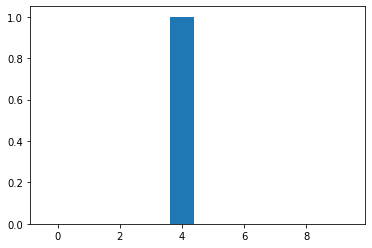

In [15]:
import matplotlib.pyplot as plt

# 分類する
result = y.eval(feed_dict={x: [imgArray_flatten]})

print(result) # 分類結果の表示。配列の先頭が0で末尾が9に相当し、可能性が高いと判定されたものほど1に近い値が表示

plt.bar(np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), result[0])